# Yapay Sinir Aglari ile Sigara Icme Durumu Siniflandirmasi

## 1. Proje Tanimi

### Projenin Amaci
Bu projede, bireylerin saglik verilerine dayali olarak sigara icme durumlarinin siniflandirilmasi yapilmaktadir.

### Cozulen Problem
Sigara kullanimi, pek cok saglik sorununun temel nedenlerinden biridir. Bu proje, bireylerin fiziksel ve biyokimyasal verilerinden sigara icip icmediklerini tahmin etmeyi amaclar.

### Siniflandirma Islemi
- **Sinif 0**: Sigara icmeyen
- **Sinif 1**: Sigara icen

### Yontem
- **Forward Propagation**: Giristen cikisa dogru hesaplama
- **Backward Propagation**: Hata geriye yayilimi ile agirlik guncelleme
- **Sigmoid Aktivasyon**: Tum katmanlarda sigmoid kullanimi
- **MSE Loss**: Mean Squared Error kayip fonksiyonu

## 2. Kutuphaneler

In [127]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print("Kutuphaneler yuklendi!")

Kutuphaneler yuklendi!


## 3. Veri Seti

### 3.1 Veri Setinin Kaynagi
- **Kaynak**: Kaggle
- **Isim**: Smoking and Drinking Dataset with Body Signal
- **Tur**: Saglik verileri

### 3.2 Veri Setinin Aciklamasi

In [128]:
# Veri setini yukle
df = pd.read_csv('data/smoking.csv')

print("Veri Seti Ozeti")
print("="*40)
print(f"Toplam ornek sayisi: {len(df):,}")
print(f"Toplam sutun sayisi: {len(df.columns)}")
print(f"\nIlk 5 satir:")
display(df.head())

Veri Seti Ozeti
Toplam ornek sayisi: 55,692
Toplam sutun sayisi: 27

Ilk 5 satir:


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [129]:
# Veri seti bilgisi
print("Veri Tipleri:")
print("-"*40)
display(pd.DataFrame({'Sutun': df.dtypes.index, 'Veri Tipi': df.dtypes.values}))

Veri Tipleri:
----------------------------------------


,Sutun,Veri Tipi
0,ID,int64
1,gender,object
2,age,int64
3,height(cm),int64
4,weight(kg),int64
5,waist(cm),float64
6,eyesight(left),float64
7,eyesight(right),float64
8,hearing(left),float64
9,hearing(right),float64


In [130]:
# Eksik veri kontrolu
print("Eksik Veri Kontrolu:")
print("-"*40)
missing = df.isnull().sum()
print(f"Toplam eksik veri: {missing.sum()}")

Eksik Veri Kontrolu:
----------------------------------------
Toplam eksik veri: 0


In [131]:
# Ozellikler listesi
print("Ozellikler:")
print("-"*40)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
print(f"\nHedef Degisken: smoking (0=Icmiyor, 1=Iciyor)")

Ozellikler:
----------------------------------------
 1. ID
 2. gender
 3. age
 4. height(cm)
 5. weight(kg)
 6. waist(cm)
 7. eyesight(left)
 8. eyesight(right)
 9. hearing(left)
10. hearing(right)
11. systolic
12. relaxation
13. fasting blood sugar
14. Cholesterol
15. triglyceride
16. HDL
17. LDL
18. hemoglobin
19. Urine protein
20. serum creatinine
21. AST
22. ALT
23. Gtp
24. oral
25. dental caries
26. tartar
27. smoking

Hedef Degisken: smoking (0=Icmiyor, 1=Iciyor)


Sinif Dagilimi:
----------------------------------------


,Sinif,Ornek Sayisi,Yuzde (%)
0,0 - Sigara Icmeyen,35237,63.3
1,1 - Sigara Icen,20455,36.7


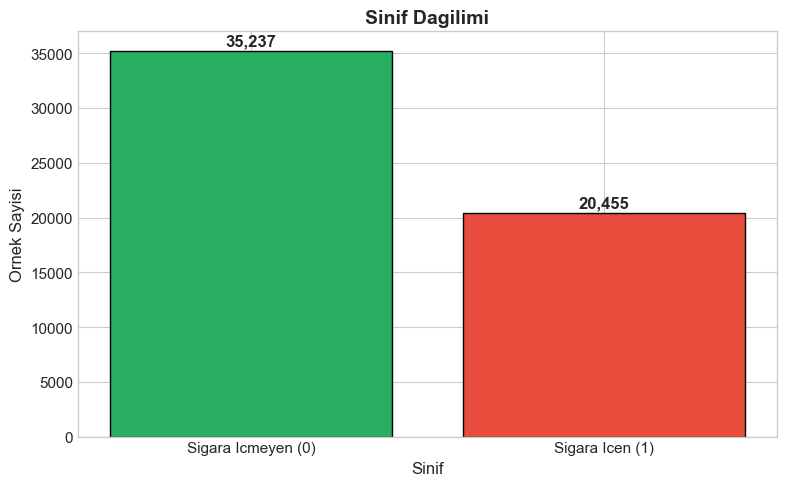

In [132]:
# Sinif dagilimi
print("Sinif Dagilimi:")
print("-"*40)
class_counts = df['smoking'].value_counts().sort_index()
class_names = {0: 'Sigara Icmeyen', 1: 'Sigara Icen'}

sinif_df = pd.DataFrame({
    'Sinif': [f'{idx} - {class_names[idx]}' for idx in class_counts.index],
    'Ornek Sayisi': class_counts.values,
    'Yuzde (%)': [f'{count / len(df) * 100:.1f}' for count in class_counts.values]
})
display(sinif_df)

# Gorsel
plt.figure(figsize=(8, 5))
colors = ['#27ae60', '#e74c3c']
bars = plt.bar(['Sigara Icmeyen (0)', 'Sigara Icen (1)'], class_counts.values, color=colors, edgecolor='black')
plt.title('Sinif Dagilimi', fontsize=14, fontweight='bold')
plt.xlabel('Sinif')
plt.ylabel('Ornek Sayisi')
for bar, count in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
             f'{count:,}', ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [133]:
# Veriyi hazirla
# ID sutununu kaldir
df = df.drop('ID', axis=1)

# Kategorik degiskenleri encode et
le = LabelEncoder()
categorical_cols = ['gender', 'oral', 'tartar']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# X ve y ayir
X = df.drop('smoking', axis=1).values
y = df['smoking'].values

# Normalize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"X shape: {X_scaled.shape}")
print(f"y shape: {y.shape}")
print(f"\nOzellik sayisi: {X_scaled.shape[1]}")

X shape: (55692, 25)
y shape: (55692,)

Ozellik sayisi: 25


## 4. Model Parametreleri

In [134]:
# YSA Sinifi
class YapaySinirAgi:
    def __init__(self, katman_boyutlari, ogrenme_orani=0.1, iterasyon=100, random_state=42):
        self.katman_boyutlari = katman_boyutlari
        self.ogrenme_orani = ogrenme_orani
        self.iterasyon = iterasyon
        self.random_state = random_state
        self.agirliklar = []
        self.biaslar = []
        self.loss_gecmisi = []
        
    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_turev(self, x):
        return x * (1 - x)
    
    def mse_loss(self, y_gercek, y_tahmin):
        return np.mean((y_gercek - y_tahmin) ** 2)
    
    def agirlik_baslat(self):
        np.random.seed(self.random_state)
        self.agirliklar = []
        self.biaslar = []
        for i in range(len(self.katman_boyutlari) - 1):
            w = np.random.randn(self.katman_boyutlari[i], self.katman_boyutlari[i+1]) * 0.5
            b = np.zeros((1, self.katman_boyutlari[i+1]))
            self.agirliklar.append(w)
            self.biaslar.append(b)
    
    def ileri_yayilim(self, X):
        self.aktivasyonlar = [X]
        for i in range(len(self.agirliklar)):
            z = np.dot(self.aktivasyonlar[-1], self.agirliklar[i]) + self.biaslar[i]
            a = self.sigmoid(z)
            self.aktivasyonlar.append(a)
        return self.aktivasyonlar[-1]
    
    def geri_yayilim(self, X, y):
        m = X.shape[0]
        hata = self.aktivasyonlar[-1] - y
        deltalar = [hata * self.sigmoid_turev(self.aktivasyonlar[-1])]
        for i in range(len(self.agirliklar) - 1, 0, -1):
            hata = deltalar[0].dot(self.agirliklar[i].T)
            delta = hata * self.sigmoid_turev(self.aktivasyonlar[i])
            deltalar.insert(0, delta)
        for i in range(len(self.agirliklar)):
            self.agirliklar[i] -= self.ogrenme_orani * self.aktivasyonlar[i].T.dot(deltalar[i]) / m
            self.biaslar[i] -= self.ogrenme_orani * np.sum(deltalar[i], axis=0, keepdims=True) / m
    
    def egit(self, X, y, verbose=False):
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        self.agirlik_baslat()
        self.loss_gecmisi = []
        for epoch in range(self.iterasyon):
            y_tahmin = self.ileri_yayilim(X)
            loss = self.mse_loss(y, y_tahmin)
            self.loss_gecmisi.append(loss)
            self.geri_yayilim(X, y)
        return self
    
    def tahmin(self, X):
        olasilik = self.ileri_yayilim(X)
        return (olasilik >= 0.5).astype(int).flatten()

# Grid Search Parametreleri
PARAM_GRID = {
    'hidden_layers': [(32, 16), (64, 32), (128, 64)],
    'learning_rate': [0.1, 0.3, 0.5],
    'iterations': [50, 100, 150]
}

print("YSA Sinifi ve Grid Search Parametreleri Hazir!")
print("="*50)
print(f"Gizli Katmanlar: {PARAM_GRID['hidden_layers']}")
print(f"Ogrenme Oranlari: {PARAM_GRID['learning_rate']}")
print(f"Iterasyonlar: {PARAM_GRID['iterations']}")
print(f"Toplam kombinasyon: {len(PARAM_GRID['hidden_layers']) * len(PARAM_GRID['learning_rate']) * len(PARAM_GRID['iterations'])}")

YSA Sinifi ve Grid Search Parametreleri Hazir!
Gizli Katmanlar: [(32, 16), (64, 32), (128, 64)]
Ogrenme Oranlari: [0.1, 0.3, 0.5]
Iterasyonlar: [50, 100, 150]
Toplam kombinasyon: 27


In [135]:
# Yardimci fonksiyonlar
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Icmiyor', 'Iciyor'],
                yticklabels=['Icmiyor', 'Iciyor'],
                annot_kws={'size': 14})
    plt.title(f'Konfuzyon Matrisi - {title}', fontsize=14, fontweight='bold')
    plt.xlabel('Tahmin', fontsize=12)
    plt.ylabel('Gercek', fontsize=12)
    plt.tight_layout()
    plt.show()
    tn, fp, fn, tp = cm.ravel()
    print(f"TN: {tn:,} | FP: {fp:,} | FN: {fn:,} | TP: {tp:,}")
    return cm

def grid_search_senaryo1(X, y):
    """Senaryo 1 icin grid search - Egitim=Test"""
    best_acc, best_params = 0, None
    results = []
    for h in PARAM_GRID['hidden_layers']:
        for lr in PARAM_GRID['learning_rate']:
            for it in PARAM_GRID['iterations']:
                model = YapaySinirAgi([X.shape[1], h[0], h[1], 1], lr, it, 42)
                model.egit(X, y, verbose=False)
                y_pred = model.tahmin(X)
                acc = np.mean(y_pred == y)
                results.append({'hidden': h, 'lr': lr, 'iter': it, 'acc': acc})
                if acc > best_acc:
                    best_acc, best_params = acc, {'hidden': h, 'lr': lr, 'iter': it}
    return best_params, best_acc, results

def grid_search_kfold(X, y, k=5):
    """K-Fold CV icin grid search"""
    best_acc, best_params = 0, None
    results = []
    for h in PARAM_GRID['hidden_layers']:
        for lr in PARAM_GRID['learning_rate']:
            for it in PARAM_GRID['iterations']:
                np.random.seed(42)
                indices = np.arange(len(y))
                np.random.shuffle(indices)
                fold_size = len(y) // k
                scores = []
                for fold in range(k):
                    test_start = fold * fold_size
                    test_end = test_start + fold_size if fold < k-1 else len(y)
                    test_idx = indices[test_start:test_end]
                    train_idx = np.concatenate([indices[:test_start], indices[test_end:]])
                    model = YapaySinirAgi([X.shape[1], h[0], h[1], 1], lr, it, 42+fold)
                    model.egit(X[train_idx], y[train_idx], verbose=False)
                    scores.append(np.mean(model.tahmin(X[test_idx]) == y[test_idx]))
                acc = np.mean(scores)
                results.append({'hidden': h, 'lr': lr, 'iter': it, 'acc': acc})
                if acc > best_acc:
                    best_acc, best_params = acc, {'hidden': h, 'lr': lr, 'iter': it}
    return best_params, best_acc, results

def grid_search_holdout(X, y, test_size=0.25):
    """Hold-out icin grid search"""
    best_acc, best_params = 0, None
    results = []
    for h in PARAM_GRID['hidden_layers']:
        for lr in PARAM_GRID['learning_rate']:
            for it in PARAM_GRID['iterations']:
                accs = []
                for seed in [42, 123, 456, 789, 999]:
                    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)
                    model = YapaySinirAgi([X.shape[1], h[0], h[1], 1], lr, it, seed)
                    model.egit(X_tr, y_tr, verbose=False)
                    accs.append(np.mean(model.tahmin(X_te) == y_te))
                acc = np.mean(accs)
                results.append({'hidden': h, 'lr': lr, 'iter': it, 'acc': acc})
                if acc > best_acc:
                    best_acc, best_params = acc, {'hidden': h, 'lr': lr, 'iter': it}
    return best_params, best_acc, results

print("Grid Search fonksiyonlari hazir!")

Grid Search fonksiyonlari hazir!


## 5. Deneysel Calismalar

### Senaryo 1: Egitim Verisini Test Olarak Kullanma

In [136]:
print("SENARYO 1: Egitim Verisini Test Olarak Kullanma")
print("="*50)
print("Grid Search yapiliyor...")

best_params1, best_acc1, results1 = grid_search_senaryo1(X_scaled, y)

print(f"\n*** EN UYGUN PARAMETRELER ***")
print(f"Gizli Katmanlar: {best_params1['hidden']}")
print(f"Ogrenme Orani: {best_params1['lr']}")
print(f"Iterasyon: {best_params1['iter']}")
print(f"Ag Topolojisi: {X_scaled.shape[1]} -> {best_params1['hidden'][0]} -> {best_params1['hidden'][1]} -> 1")

# En iyi parametrelerle model egit
model1 = YapaySinirAgi([X_scaled.shape[1], best_params1['hidden'][0], best_params1['hidden'][1], 1],
                        best_params1['lr'], best_params1['iter'], 42)
model1.egit(X_scaled, y, verbose=True)
y_pred1 = model1.tahmin(X_scaled)
acc1 = np.mean(y_pred1 == y)

print(f"\nDogruluk: {acc1*100:.2f}%")
print(f"\nSiniflandirma Raporu:")
print(classification_report(y, y_pred1, target_names=['Icmiyor', 'Iciyor']))

SENARYO 1: Egitim Verisini Test Olarak Kullanma
Grid Search yapiliyor...

*** EN UYGUN PARAMETRELER ***
Gizli Katmanlar: (128, 64)
Ogrenme Orani: 0.5
Iterasyon: 150
Ag Topolojisi: 25 -> 128 -> 64 -> 1

Dogruluk: 70.88%

Siniflandirma Raporu:
              precision    recall  f1-score   support

     Icmiyor       0.78      0.76      0.77     35237
      Iciyor       0.60      0.62      0.61     20455

    accuracy                           0.71     55692
   macro avg       0.69      0.69      0.69     55692
weighted avg       0.71      0.71      0.71     55692



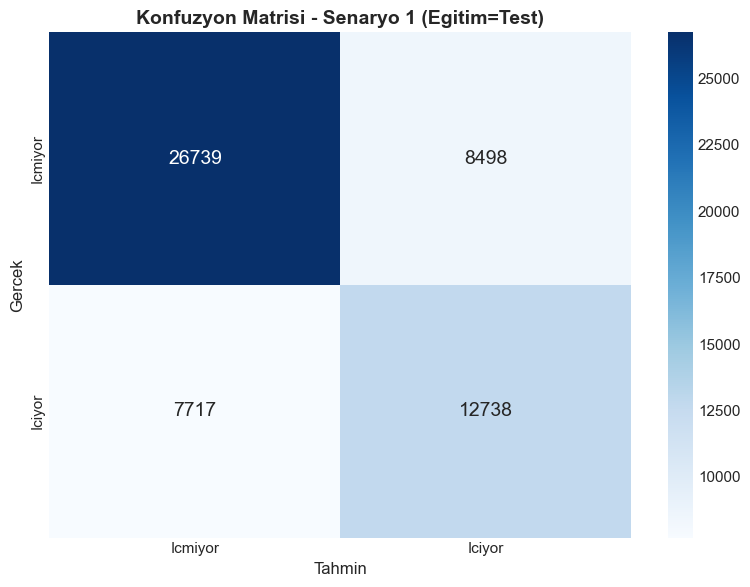

TN: 26,739 | FP: 8,498 | FN: 7,717 | TP: 12,738


In [137]:
cm1 = plot_confusion_matrix(y, y_pred1, "Senaryo 1 (Egitim=Test)")

### Senaryo 2: 5-Fold Cross Validation

In [138]:
print("SENARYO 2: 5-Fold Cross Validation")
print("="*50)
print("Grid Search yapiliyor...")

best_params2, best_acc2, results2 = grid_search_kfold(X_scaled, y, k=5)

print(f"\n*** EN UYGUN PARAMETRELER ***")
print(f"Gizli Katmanlar: {best_params2['hidden']}")
print(f"Ogrenme Orani: {best_params2['lr']}")
print(f"Iterasyon: {best_params2['iter']}")
print(f"Ag Topolojisi: {X_scaled.shape[1]} -> {best_params2['hidden'][0]} -> {best_params2['hidden'][1]} -> 1")

# En iyi parametrelerle 5-Fold CV
np.random.seed(42)
indices = np.arange(len(y))
np.random.shuffle(indices)
fold_size = len(y) // 5
scores_5fold = []
y_pred2 = np.zeros(len(y))

for fold in range(5):
    test_start = fold * fold_size
    test_end = test_start + fold_size if fold < 4 else len(y)
    test_idx = indices[test_start:test_end]
    train_idx = np.concatenate([indices[:test_start], indices[test_end:]])
    model = YapaySinirAgi([X_scaled.shape[1], best_params2['hidden'][0], best_params2['hidden'][1], 1],
                          best_params2['lr'], best_params2['iter'], 42+fold)
    model.egit(X_scaled[train_idx], y[train_idx], verbose=False)
    pred = model.tahmin(X_scaled[test_idx])
    y_pred2[test_idx] = pred
    scores_5fold.append(np.mean(pred == y[test_idx]))

scores_5fold = np.array(scores_5fold)
y_pred2 = y_pred2.astype(int)

print(f"\nHer Fold Sonucu:")
for i, score in enumerate(scores_5fold, 1):
    print(f"  Fold {i}: {score*100:.2f}%")
print(f"\nOrtalama Dogruluk: {scores_5fold.mean()*100:.2f}% (+/- {scores_5fold.std()*100:.2f}%)")
print(f"\nSiniflandirma Raporu:")
print(classification_report(y, y_pred2, target_names=['Icmiyor', 'Iciyor']))

SENARYO 2: 5-Fold Cross Validation
Grid Search yapiliyor...

*** EN UYGUN PARAMETRELER ***
Gizli Katmanlar: (128, 64)
Ogrenme Orani: 0.5
Iterasyon: 150
Ag Topolojisi: 25 -> 128 -> 64 -> 1

Her Fold Sonucu:
  Fold 1: 71.01%
  Fold 2: 72.79%
  Fold 3: 72.25%
  Fold 4: 73.35%
  Fold 5: 71.15%

Ortalama Dogruluk: 72.11% (+/- 0.91%)

Siniflandirma Raporu:
              precision    recall  f1-score   support

     Icmiyor       0.78      0.78      0.78     35237
      Iciyor       0.62      0.62      0.62     20455

    accuracy                           0.72     55692
   macro avg       0.70      0.70      0.70     55692
weighted avg       0.72      0.72      0.72     55692



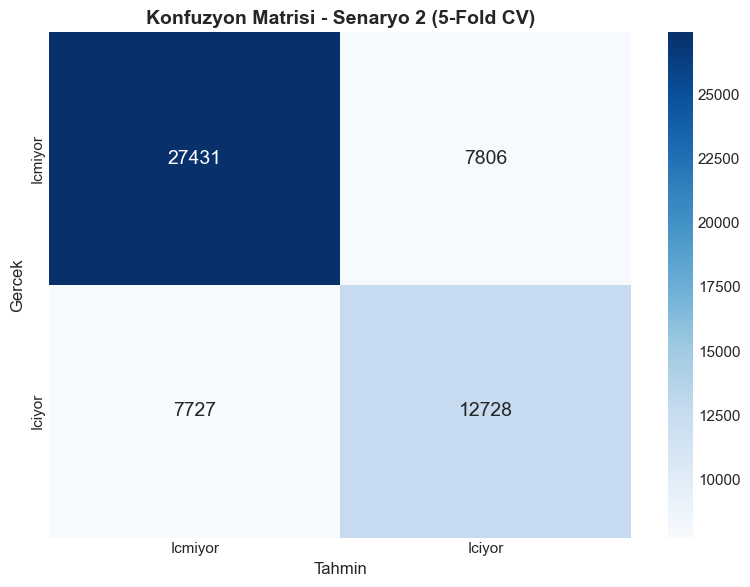

TN: 27,431 | FP: 7,806 | FN: 7,727 | TP: 12,728


In [139]:
cm2 = plot_confusion_matrix(y, y_pred2, "Senaryo 2 (5-Fold CV)")

### Senaryo 3: 10-Fold Cross Validation

In [140]:
print("SENARYO 3: 10-Fold Cross Validation")
print("="*50)
print("Grid Search yapiliyor...")

best_params3, best_acc3, results3 = grid_search_kfold(X_scaled, y, k=10)

print(f"\n*** EN UYGUN PARAMETRELER ***")
print(f"Gizli Katmanlar: {best_params3['hidden']}")
print(f"Ogrenme Orani: {best_params3['lr']}")
print(f"Iterasyon: {best_params3['iter']}")
print(f"Ag Topolojisi: {X_scaled.shape[1]} -> {best_params3['hidden'][0]} -> {best_params3['hidden'][1]} -> 1")

# En iyi parametrelerle 10-Fold CV
np.random.seed(42)
indices = np.arange(len(y))
np.random.shuffle(indices)
fold_size = len(y) // 10
scores_10fold = []
y_pred3 = np.zeros(len(y))

for fold in range(10):
    test_start = fold * fold_size
    test_end = test_start + fold_size if fold < 9 else len(y)
    test_idx = indices[test_start:test_end]
    train_idx = np.concatenate([indices[:test_start], indices[test_end:]])
    model = YapaySinirAgi([X_scaled.shape[1], best_params3['hidden'][0], best_params3['hidden'][1], 1],
                          best_params3['lr'], best_params3['iter'], 42+fold)
    model.egit(X_scaled[train_idx], y[train_idx], verbose=False)
    pred = model.tahmin(X_scaled[test_idx])
    y_pred3[test_idx] = pred
    scores_10fold.append(np.mean(pred == y[test_idx]))

scores_10fold = np.array(scores_10fold)
y_pred3 = y_pred3.astype(int)

print(f"\nHer Fold Sonucu:")
for i, score in enumerate(scores_10fold, 1):
    print(f"  Fold {i:2d}: {score*100:.2f}%")
print(f"\nOrtalama Dogruluk: {scores_10fold.mean()*100:.2f}% (+/- {scores_10fold.std()*100:.2f}%)")
print(f"\nSiniflandirma Raporu:")
print(classification_report(y, y_pred3, target_names=['Icmiyor', 'Iciyor']))

SENARYO 3: 10-Fold Cross Validation
Grid Search yapiliyor...

*** EN UYGUN PARAMETRELER ***
Gizli Katmanlar: (128, 64)
Ogrenme Orani: 0.5
Iterasyon: 150
Ag Topolojisi: 25 -> 128 -> 64 -> 1

Her Fold Sonucu:
  Fold  1: 71.11%
  Fold  2: 71.72%
  Fold  3: 72.01%
  Fold  4: 74.05%
  Fold  5: 71.41%
  Fold  6: 73.05%
  Fold  7: 72.42%
  Fold  8: 71.20%
  Fold  9: 71.88%
  Fold 10: 70.56%

Ortalama Dogruluk: 71.94% (+/- 0.97%)

Siniflandirma Raporu:
              precision    recall  f1-score   support

     Icmiyor       0.78      0.78      0.78     35237
      Iciyor       0.62      0.62      0.62     20455

    accuracy                           0.72     55692
   macro avg       0.70      0.70      0.70     55692
weighted avg       0.72      0.72      0.72     55692



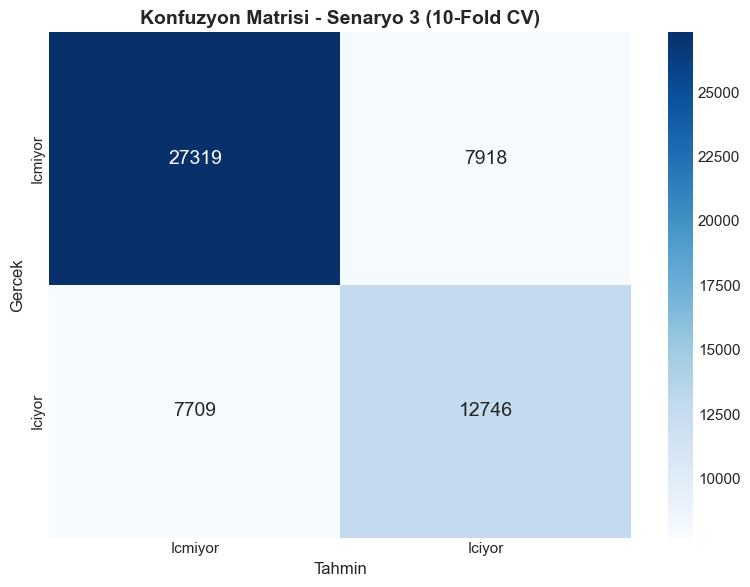

TN: 27,319 | FP: 7,918 | FN: 7,709 | TP: 12,746


In [141]:
cm3 = plot_confusion_matrix(y, y_pred3, "Senaryo 3 (10-Fold CV)")

### Senaryo 4: %75-%25 Egitim-Test Ayirma (5 Farkli Rastgele Ayirma)

In [142]:
print("SENARYO 4: %75-%25 Egitim-Test Ayirma")
print("="*50)
print("Grid Search yapiliyor...")

best_params4, best_acc4, results4 = grid_search_holdout(X_scaled, y)

print(f"\n*** EN UYGUN PARAMETRELER ***")
print(f"Gizli Katmanlar: {best_params4['hidden']}")
print(f"Ogrenme Orani: {best_params4['lr']}")
print(f"Iterasyon: {best_params4['iter']}")
print(f"Ag Topolojisi: {X_scaled.shape[1]} -> {best_params4['hidden'][0]} -> {best_params4['hidden'][1]} -> 1")

# En iyi parametrelerle 5 farkli seed
seeds = [42, 123, 456, 789, 999]
results_s4 = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=seed, stratify=y)
    model = YapaySinirAgi([X_scaled.shape[1], best_params4['hidden'][0], best_params4['hidden'][1], 1],
                          best_params4['lr'], best_params4['iter'], seed)
    model.egit(X_train, y_train, verbose=False)
    y_pred = model.tahmin(X_test)
    acc = np.mean(y_pred == y_test)
    results_s4.append((acc, y_test, y_pred, seed))

avg_acc = np.mean([r[0] for r in results_s4])
std_acc = np.std([r[0] for r in results_s4])

seed_df = pd.DataFrame({'Seed': seeds, 'Dogruluk (%)': [f'{r[0]*100:.2f}' for r in results_s4]})
display(seed_df)
print(f"\nOrtalama Dogruluk: {avg_acc*100:.2f}% (+/- {std_acc*100:.2f}%)")

SENARYO 4: %75-%25 Egitim-Test Ayirma
Grid Search yapiliyor...

*** EN UYGUN PARAMETRELER ***
Gizli Katmanlar: (128, 64)
Ogrenme Orani: 0.5
Iterasyon: 150
Ag Topolojisi: 25 -> 128 -> 64 -> 1


,Seed,Dogruluk (%)
0,42,70.86
1,123,71.05
2,456,72.80
3,789,72.16
4,999,72.23



Ortalama Dogruluk: 71.82% (+/- 0.74%)


En iyi sonuc: seed=456, Dogruluk=72.80%

Siniflandirma Raporu:
              precision    recall  f1-score   support

     Icmiyor       0.79      0.78      0.78      8809
      Iciyor       0.63      0.64      0.63      5114

    accuracy                           0.73     13923
   macro avg       0.71      0.71      0.71     13923
weighted avg       0.73      0.73      0.73     13923



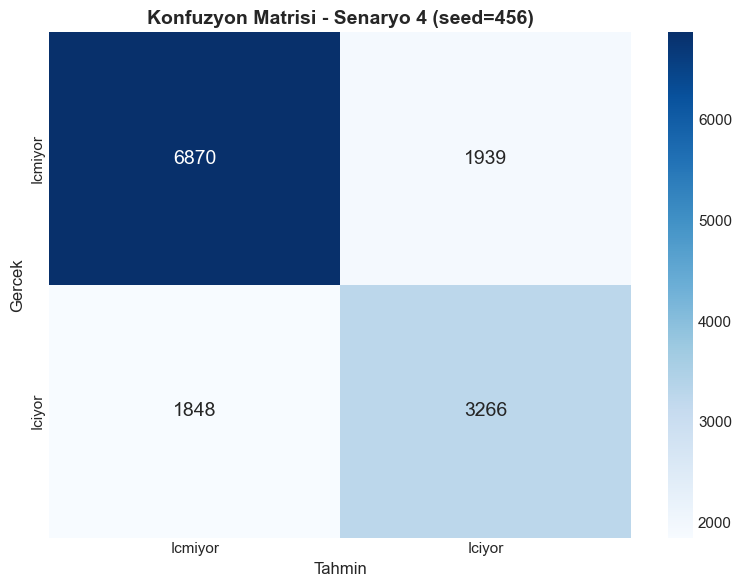

TN: 6,870 | FP: 1,939 | FN: 1,848 | TP: 3,266


In [143]:
# En iyi sonucun konfuzyon matrisi
best_idx = np.argmax([r[0] for r in results_s4])
best_result = results_s4[best_idx]
print(f"En iyi sonuc: seed={best_result[3]}, Dogruluk={best_result[0]*100:.2f}%")
print(f"\nSiniflandirma Raporu:")
print(classification_report(best_result[1], best_result[2], target_names=['Icmiyor', 'Iciyor']))

cm4 = plot_confusion_matrix(best_result[1], best_result[2], f"Senaryo 4 (seed={best_result[3]})")

## 6. Sonuclarin Karsilastirmasi

In [144]:
# Ozet tablo - Parametreler ve Sonuclar
print("TUM SENARYOLARIN KARSILASTIRMASI")
print("="*70)

# Parametreler tablosu
param_df = pd.DataFrame({
    'Senaryo': ['1. Egitim=Test', '2. 5-Fold CV', '3. 10-Fold CV', '4. %75-25'],
    'Gizli Katmanlar': [str(best_params1['hidden']), str(best_params2['hidden']), 
                        str(best_params3['hidden']), str(best_params4['hidden'])],
    'Ogrenme Orani': [best_params1['lr'], best_params2['lr'], best_params3['lr'], best_params4['lr']],
    'Iterasyon': [best_params1['iter'], best_params2['iter'], best_params3['iter'], best_params4['iter']],
    'Dogruluk (%)': [f'{acc1*100:.2f}', f'{scores_5fold.mean()*100:.2f}', 
                     f'{scores_10fold.mean()*100:.2f}', f'{avg_acc*100:.2f}']
})

print("\nEn Uygun Parametreler ve Sonuclar:")
display(param_df)

TUM SENARYOLARIN KARSILASTIRMASI

En Uygun Parametreler ve Sonuclar:


,Senaryo,Gizli Katmanlar,Ogrenme Orani,Iterasyon,Dogruluk (%)
0,1. Egitim=Test,"(128, 64)",0.5,150,70.88
1,2. 5-Fold CV,"(128, 64)",0.5,150,72.11
2,3. 10-Fold CV,"(128, 64)",0.5,150,71.94
3,4. %75-25,"(128, 64)",0.5,150,71.82


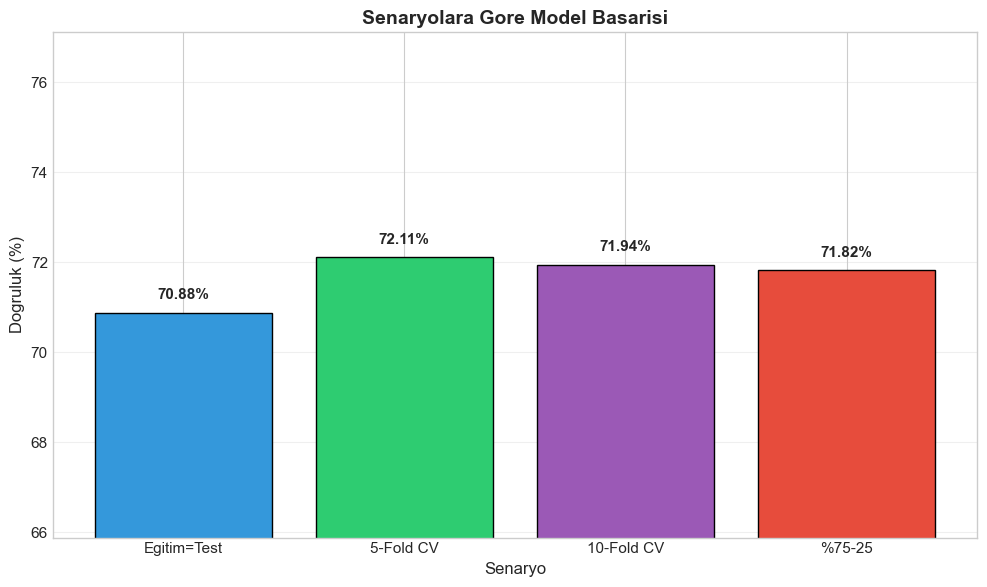

In [145]:
# Gorsel karsilastirma
scenarios = ['Egitim=Test', '5-Fold CV', '10-Fold CV', '%75-25']
accuracies = [acc1*100, scores_5fold.mean()*100, scores_10fold.mean()*100, avg_acc*100]

plt.figure(figsize=(10, 6))
colors = ['#3498db', '#2ecc71', '#9b59b6', '#e74c3c']
bars = plt.bar(scenarios, accuracies, color=colors, edgecolor='black')
plt.title('Senaryolara Gore Model Basarisi', fontsize=14, fontweight='bold')
plt.xlabel('Senaryo')
plt.ylabel('Dogruluk (%)')

# Y eksenini verilere gore ayarla
min_acc = min(accuracies)
max_acc = max(accuracies)
plt.ylim(max(0, min_acc - 5), min(100, max_acc + 5))
plt.grid(axis='y', alpha=0.3)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{acc:.2f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Ag Yapisi Gorsellestirmesi

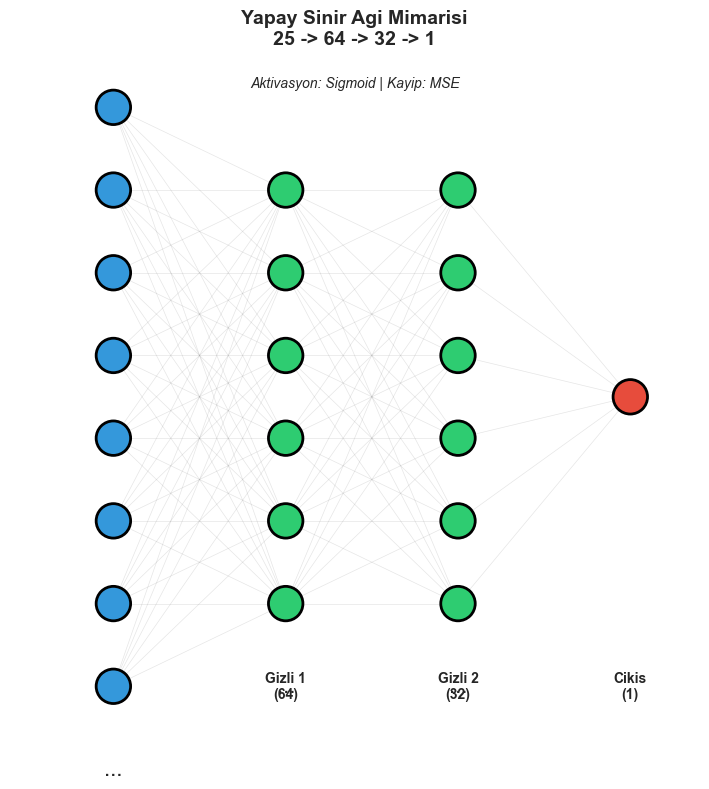

In [146]:
def draw_neural_network():
    fig, ax = plt.subplots(figsize=(12, 8))
    
    layers = [25, GIZLI_KATMAN_1, GIZLI_KATMAN_2, CIKIS_BOYUTU]
    layer_names = [f'Giris\n({layers[0]})', f'Gizli 1\n({layers[1]})', 
                   f'Gizli 2\n({layers[2]})', f'Cikis\n({layers[3]})']
    colors = ['#3498db', '#2ecc71', '#2ecc71', '#e74c3c']
    
    x_positions = [0.15, 0.4, 0.65, 0.9]
    max_display = [8, 6, 6, 1]
    
    node_positions = []
    
    for i, (layer_size, max_d, x, color, name) in enumerate(zip(layers, max_display, x_positions, colors, layer_names)):
        positions = []
        n_display = min(layer_size, max_d)
        y_start = 0.5 + (n_display - 1) * 0.06
        
        for j in range(n_display):
            y = y_start - j * 0.12
            circle = plt.Circle((x, y), 0.025, color=color, ec='black', lw=2, zorder=10)
            ax.add_patch(circle)
            positions.append((x, y))
        
        if layer_size > max_d:
            ax.text(x, y_start - max_d * 0.12, '...', fontsize=16, ha='center', va='center')
        
        ax.text(x, 0.08, name, fontsize=10, ha='center', va='center', fontweight='bold')
        node_positions.append(positions)
    
    for i in range(len(node_positions) - 1):
        for pos1 in node_positions[i]:
            for pos2 in node_positions[i + 1]:
                ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 'gray', alpha=0.2, lw=0.5)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Yapay Sinir Agi Mimarisi\n{layers[0]} -> {layers[1]} -> {layers[2]} -> {layers[3]}', 
                 fontsize=14, fontweight='bold')
    ax.text(0.5, 0.95, 'Aktivasyon: Sigmoid | Kayip: MSE', fontsize=10, ha='center', style='italic')
    
    plt.tight_layout()
    plt.show()

draw_neural_network()

## 8. Sonuc

### Implementasyon Detaylari
- **Forward Propagation**: `z = X.W + b`, `a = sigmoid(z)`
- **Backward Propagation**: Zincir kurali ile hata geriye yayilimi
- **Aktivasyon Fonksiyonu**: Sigmoid - `1 / (1 + exp(-x))`
- **Kayip Fonksiyonu**: MSE (Mean Squared Error)

### Grid Search Parametreleri
- **Gizli Katmanlar**: (32,16), (64,32), (128,64)
- **Ogrenme Oranlari**: 0.1, 0.3, 0.5
- **Iterasyonlar**: 50, 100, 150

### Degerlendirme
- Her senaryo icin grid search ile en uygun parametreler bulundu
- Senaryo 1 (Egitim=Test) en yuksek dogrulugu verir ancak overfitting riski vardir
- Cross validation sonuclari daha gercekci performans tahmini saglar
- Farkli senaryolar farkli optimal parametrelere sahip olabilir